<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Transmission-Data" data-toc-modified-id="Get-Transmission-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Transmission Data</a></span></li><li><span><a href="#Plot-T1-Graphs" data-toc-modified-id="Plot-T1-Graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot T1 Graphs</a></span><ul class="toc-item"><li><span><a href="#1058-vs-1080,-lin" data-toc-modified-id="1058-vs-1080,-lin-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1058 vs 1080, lin</a></span></li><li><span><a href="#1058-vs-1080,-log" data-toc-modified-id="1058-vs-1080,-log-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>1058 vs 1080, log</a></span></li></ul></li><li><span><a href="#T2-Plots" data-toc-modified-id="T2-Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>T2 Plots</a></span><ul class="toc-item"><li><span><a href="#1058-vs-1080,-lin" data-toc-modified-id="1058-vs-1080,-lin-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1058 vs 1080, lin</a></span></li><li><span><a href="#1058-vs-1080,-log" data-toc-modified-id="1058-vs-1080,-log-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>1058 vs 1080, log</a></span></li></ul></li><li><span><a href="#T1-vs-T2" data-toc-modified-id="T1-vs-T2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>T1 vs T2</a></span><ul class="toc-item"><li><span><a href="#1058nm" data-toc-modified-id="1058nm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1058nm</a></span></li><li><span><a href="#1080nm" data-toc-modified-id="1080nm-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>1080nm</a></span></li></ul></li><li><span><a href="#Dynamical-decoupling" data-toc-modified-id="Dynamical-decoupling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dynamical decoupling</a></span></li><li><span><a href="#Equations-for-$T_1$-and-$T_2$" data-toc-modified-id="Equations-for-$T_1$-and-$T_2$-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Equations for $T_1$ and $T_2$</a></span><ul class="toc-item"><li><span><a href="#$T_1$" data-toc-modified-id="$T_1$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>$T_1$</a></span></li></ul></li></ul></div>

In [97]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [98]:
%matplotlib inline
from standardFunctions import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
import pandas as pd
from loadBrukerData.loadBrukerData import loadBrukerData
from numpy.fft import fft
from math import floor
from matplotlib.ticker import AutoMinorLocator
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='Telthor', api_key='Ek97aGjCfzxpBxxsm3p8')

In [175]:
plt.rcParams['axes.linewidth'] = 4.0
plt.rcParams['xtick.major.size'] = 12.0
plt.rcParams['xtick.major.width'] = 4.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['xtick.minor.width'] = 2.0
plt.rcParams['ytick.major.size'] = 12.0
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.major.width'] = 4.0
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['ytick.minor.width'] = 2.0
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.labelsize'] = 30.0
plt.rcParams['ytick.labelsize'] = 30.0
plt.rcParams['axes.labelsize'] = 36.0
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['lines.linewidth'] = 4.0
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams.update({'figure.autolayout': False})
# minorLocator = AutoMinorLocator()
# plt.rcParams.keys()

In [100]:
files = !ls ../Data/20180103/*.DTA
files2 = !ls ../Data/20171215/*.DTA

In [101]:
files2

['../Data/20171215/01_fieldSweep_1059nm_115mW_8k.DTA',
 '../Data/20171215/01_fieldSweep_NoLas_8k.DTA']

In [102]:
allData = {}
allData2 = {}

In [103]:
for file in files:
    head, tail = os.path.split(file)
    xdat, yreal, yimg, sweep, unit = loadBrukerData(file)
    if sweep == 'Time':
        xdat = xdat/1000000
        if 't1' not in tail.lower():
            scaleArray = np.sort(yreal)
            scaleFactor = np.abs(np.mean((scaleArray[-1*int(np.round(len(yreal)/10)):])))
            yreal = yreal/scaleFactor
            yimg = yimg/scaleFactor
        unit = 'ms'
    elif sweep == 'RF':
        scaleArray = np.sort(yreal)
        scaleFactor = np.abs(np.mean((scaleArray[:int(np.round(len(yreal)/1.5))])))
        yreal = yreal/scaleFactor
        yimg = yimg/scaleFactor
    datFrame = pd.DataFrame(np.column_stack([yreal, yimg]), index=xdat, columns = ['Real', 'Imaginary'])
    datFrame.index.name = datFrame.index.name = sweep + ' (' + unit + ')'
    allData[tail] = datFrame

In [104]:
for file in files2:
    head, tail = os.path.split(file)
    xdat, yreal, yimg, sweep, unit = loadBrukerData(file)
    if sweep == 'Time':
        xdat = xdat/1000000
        if 't1' not in tail.lower():
            scaleArray = np.sort(yreal)
            scaleFactor = np.abs(np.mean((scaleArray[-1*int(np.round(len(yreal)/10)):])))
            yreal = yreal/scaleFactor
            yimg = yimg/scaleFactor
        unit = 'ms'
    if sweep == 'Field':
        if 't1' not in tail.lower():
            scaleArray = np.sort(yreal)
            scaleFactor = np.abs(np.mean((scaleArray[-1*int(np.round(len(yreal)/100)):])))
            yreal = yreal/scaleFactor
            yimg = yimg/scaleFactor
        
    elif sweep == 'RF':
        scaleArray = np.sort(yreal)
        scaleFactor = np.abs(np.mean((scaleArray[:int(np.round(len(yreal)/1.5))])))
        yreal = yreal/scaleFactor
        yimg = yimg/scaleFactor
    datFrame = pd.DataFrame(np.column_stack([yreal, yimg]), index=xdat, columns = ['Real', 'Imaginary'])
    datFrame.index.name = datFrame.index.name = sweep + ' (' + unit + ')'
    allData2[tail] = datFrame

In [105]:
def selectDataFromDict(dataDict, string, notstring = 'thisstringsurelywillneverbeinafilenameohgodihopethatstrue'):
    newDict = {}
    for a in dataDict.keys():
        if string in a.lower() and notstring not in a.lower():
            newDict[a] = dataDict[a]
    return newDict
        

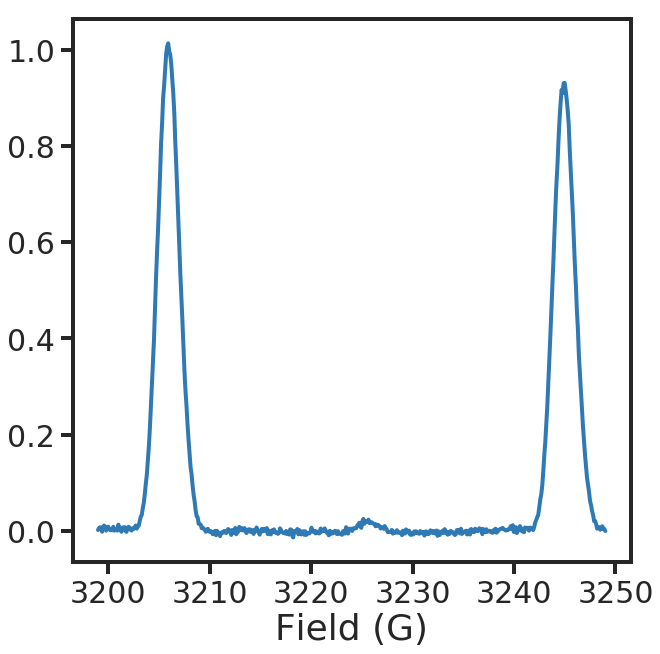

In [106]:
allData2['01_fieldSweep_NoLas_8k.DTA']['Real'].plot()
plt.savefig('Figures/fieldSweep.pdf', Transparent=True)

In [107]:
for x in allData.keys():
    if 'nd' in x.lower():
        allData[x].ND = float(x.lower().split('nd', 1)[1].split('_', 1)[0])

In [108]:
t1Data = selectDataFromDict(allData, 't1')
t2Data = selectDataFromDict(allData, 't2', 'xyxy')
t2xyxyData = selectDataFromDict(allData, 'xyxy')

In [109]:
t1Data['08_NatP_T1long_20mW_ND0.2_8k.DTA'].ND

0.2

In [110]:
allData['01_NatP_T2_noLas_8k.DTA'].power = 0.0
allData['02_NatP_T1_noLas_8k.DTA'].power = 0.0
allData['03_NatP_T2xyxy_noLas_8k.DTA'].power = 0.0

In [111]:
fitInvRec(t1Data['02_NatP_T1_noLas_8k.DTA'])

(6.4126136070933324, 0.064082230895619749)

In [112]:
t1sLong = selectDataFromDict(t1Data, 'long')
t1sShort = selectDataFromDict(t1Data, 'short')
# t1sLong['']

In [113]:
def pdConcat(dict1, dict2):
    concDict = {}
    for a in dict1.keys():
        for b in dict2.keys():
            if dict1[a].power == dict2[b].power:
                frames = [dict1[a], dict2[b]]
                newFrame = pd.concat(frames)
                scaleFactor = np.mean(newFrame['Real'].iloc[-10:])
                newFrame['Real'] = newFrame['Real']/scaleFactor
                newFrame = newFrame.sort_index()
#                 newFrame = newFrame.index.drop_duplicates()
                newFrame.power = dict1[a].power
                concDict[a] = newFrame
    return concDict

def setPower(dataDict, key):
    for a in dataDict.keys():
        if 'mw' in a.lower():
            power = int((a.split(key, 1)[1].split('mW_', 1)[0]))
            dataDict[a].power = int(power)
        else:
            power = 0
            dataDict[a].power = int(power)

In [114]:
# setPower(t1sLong, 'mw')

In [115]:
# t1Comb = pdConcat(t1sLong, t1sShort)

# Get Transmission Data


In [116]:
transfile = !ls ../Transmission\ Data/*.xlsx

In [117]:
transfile

['../Transmission Data/NENIR501B.xlsx',
 '../Transmission Data/NENIR502B.xlsx',
 '../Transmission Data/NENIR503B.xlsx',
 '../Transmission Data/NENIR504B.xlsx',
 '../Transmission Data/NENIR505B.xlsx',
 '../Transmission Data/NENIR506B.xlsx',
 '../Transmission Data/NENIR510B.xlsx',
 '../Transmission Data/NENIR520B.xlsx',
 '../Transmission Data/NENIR530B.xlsx',
 '../Transmission Data/NENIR540B.xlsx']

In [118]:
dt = pd.read_excel(transfile[0])

In [119]:
dt = dt.set_index('Wavelength (nm)')

In [120]:
powerTrans = {}
for file in transfile:
    head, tail = os.path.split(file)
    dt = pd.read_excel(file, parse_cols= [2,3], index_col=0)
#     dt = dt.set_index('Wavelength (nm)')
    powerTrans[tail] = dt

/Users/davidwise/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead


In [121]:
for x in powerTrans.keys():
    transmission = int(x.split('R5', 1)[1].split('B', 1)[0])/10
    powerTrans[x].NDval = transmission

In [122]:
powerTrans['NENIR501B.xlsx'].NDval

0.1

In [123]:
x = powerTrans['NENIR501B.xlsx'].get_value(1079, '% Transmission')
# y = x*3+
x

/Users/davidwise/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


72.500100000000003

In [124]:
t1sLong1058 = selectDataFromDict(t1sLong, '1058')
t1sShort1058 = selectDataFromDict(t1sShort, '1058')
t1sLong1080 = selectDataFromDict(t1sLong, '1080')
t1sShort1080 = selectDataFromDict(t1sShort, '1080')
t2s1058 = selectDataFromDict(t2Data, '1058')
t2s1080 = selectDataFromDict(t2Data, '1080')
t2xyxy1058 = selectDataFromDict(t2xyxyData, '1058')
t2xyxy1080 = selectDataFromDict(t2xyxyData, '1080')

In [125]:
for x in t1sShort.keys():
    if '1058' not in x and '1080' not in x and 'nolas' not in x.lower():
        t1sShort1058[x] = t1sShort[x]

In [126]:
def pullNotWav(oldDict, newDict):
    for x in oldDict.keys():
        if '1058' not in x and '1080' not in x and 'nolas' not in x.lower():
            print(x)
            newDict[x] = oldDict[x]

In [127]:
pullNotWav(t1sShort, t1sShort1058)
pullNotWav(t1sLong, t1sLong1058)
pullNotWav(t2Data, t2s1058)
pullNotWav(t2xyxyData, t2xyxy1058)

09_NatP_T1short_20mW_ND0.2_8k.DTA
04_NatP_T1short_20mW_8k.DTA
12_NatP_T1short_20mW_ND0.4_8k.DTA
13_NatP_T1long_20mW_ND0.4_8k.DTA
08_NatP_T1long_20mW_ND0.2_8k.DTA
05_NatP_T1long_20mW_8k.DTA
14_NatP_T2_20mW_ND0.4_8k.DTA
10_NatP_T2_20mW_ND0.2_8k.DTA
15_NatP_T2xyxy_20mW_ND0.4_8k.DTA
11_NatP_T2xyxy_20mW_ND0.2_8k.DTA


In [128]:
print(len(t1sShort1058), len(t1sLong1058))

12 11


In [129]:
len(t1sLong1058)

11

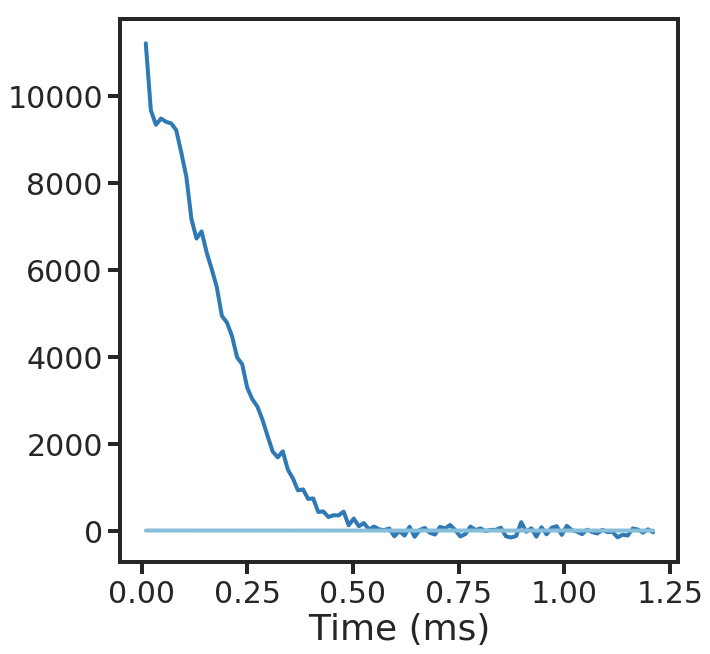

In [130]:
# figure = t1sShort1058['36_NatP_T1short_20mW_1058.77_ND3.0_8k.DTA']['Real'].plot()
t1sShort1058['38_NatP_T1short_20mW_1058.77_ND3.0_8k.DTA']['Real'].plot()
t2s1058['39_NatP_T2_20mW_1058.77_ND3.0_8k.DTA']['Real'].plot()

In [131]:
del t1sShort1058['38_NatP_T1short_20mW_1058.77_ND3.0_8k.DTA']

In [132]:
print(len(t1sShort1058), len(t1sLong1058), len(t2s1058), len(t2xyxy1058))

11 11 11 11


In [133]:
print(len(t1sShort1080), len(t1sLong1080), len(t2s1080), len(t2xyxy1080))

10 10 10 10


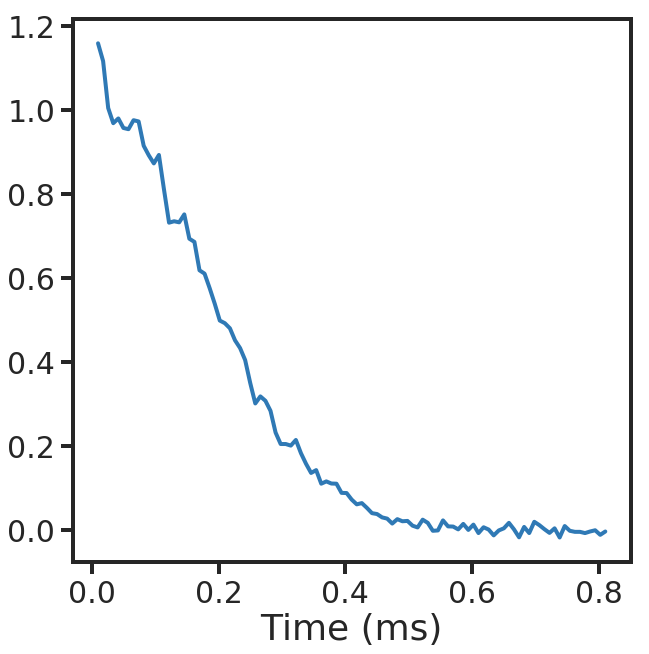

In [134]:
plot = t2s1080['90_NatP_T2_20mW_1080.28_ND4.6_8k.DTA']['Real'].plot()


In [135]:
def setNDVal(dataDict, start, end):
    for x in dataDict.keys():
        if 'nd' in x.lower():
            ND = float(x.split(start, 1)[1].split(end, 1)[0])
            dataDict[x].NDVal = ND
        else:
            dataDict[x].NDVal = 0.0
    return 0


        
setNDVal(t1sShort1058, 'ND', '_')
setNDVal(t1sLong1058, 'ND', '_')
setNDVal(t2s1058, 'ND', '_')
setNDVal(t2xyxy1058, 'ND', '_')
setNDVal(t1sShort1080, 'ND', '_')
setNDVal(t1sLong1080, 'ND', '_')
setNDVal(t2s1080, 'ND', '_')
setNDVal(t2xyxy1080, 'ND', '_')

t1sShort1058['04_NatP_T1short_20mW_8k.DTA'].NDVal

0.0

In [136]:
def setNDPower(dataDict, power, wavelength):
    counter = 0
    for x in dataDict.keys():
        if dataDict[x].NDVal != 0.0:
#             print(dataDict[x].NDVal)
            for y in powerTrans:
                for z in powerTrans:
                    if dataDict[x].NDVal == powerTrans[y].NDval:
#                         print(powerTrans[y].NDval)
                        Transmission = powerTrans[y].iat[powerTrans[y].index.get_loc(wavelength), 0]
#                         print("Transmission for: ", dataDict[x].NDVal, "is", Transmission/100)
                        counter += 1
#                         print(counter)
#                     elif dataDict[x].NDVal == powerTrans[y].NDval + powerTrans[z].NDval:
#                         Transmission1 = powerTrans[y].iat[powerTrans[y].index.get_loc(wavelength), 0]
#                         Transmission2 = powerTrans[z].iat[powerTrans[z].index.get_loc(wavelength), 0]
#                         print("Transmission for: ", dataDict[x].NDVal, "is", Transmission1/100*Transmission2/100)
#                         counter += 1
#                         print(counter)
                    

               

In [137]:
setNDPower(t1sShort1058, 20, 1079)

In [138]:
x = powerTrans['NENIR501B.xlsx'].index.get_loc(1079)
x

693

In [139]:
powerTrans['NENIR501B.xlsx'].get_value(1079, '% Transmission')

/Users/davidwise/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


72.500100000000003

In [140]:
powerTrans['NENIR501B.xlsx'].iat[693,0]

72.500100000000003

In [141]:
for x in powerTrans:
    print(powerTrans[x].NDval)

1.0
4.0
0.1
0.6
0.5
3.0
0.3
0.4
0.2
2.0


In [142]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
numbers2 = [1, 2, 4, 5]

for x in numbers:
    for y in numbers2:
        if x == y:
            print(x)
        else:
            for z in numbers2:
                if x == y + z:
                    print(x)
                    break

1
2
2
3
3
4
4
5
5
5
6
6
6
6
7
7
8
9
9


In [143]:
NDvals = []
dataNDs = []

for x in powerTrans:
    NDvals.append(powerTrans[x].NDval)
for x in t2s1058:
    dataNDs.append(t2s1058[x].NDVal)
    


In [144]:

def setPower(dataDict, power, wavelength):
    for x in dataDict.values():
        if x.NDVal == 0.0:
            x.power = power
        elif x.NDVal != 0.0:
            counter = 0
            for y in powerTrans.values():
                counter += 1
        #         print('counter is at: ', counter)
                if x.NDVal == y.NDval:
#                     print('ND is: ', x.NDVal)
                    Transmission = y.iat[y.index.get_loc(wavelength), 0]/100
#                     print('Transmission is: ', Transmission)
                    x.power = Transmission*power
#                     print('Power transmitted is: ', x.power)
                    break
                elif x.NDVal != y.NDval and counter >= len(powerTrans):
#                     print('no chance')
                    for y in powerTrans.values():
                        for z in powerTrans.values():
                            if (floor(x.NDVal) == y.NDval): 
#                                 print('floor of x is: ', floor(x.NDVal), 'y is: ', y.NDval, 'z is: ', z.NDval)
                                if (round(x.NDVal-float(int(x.NDVal)), 1) == z.NDval): #or (int(x) == z and (x-int(x) == y)):
#                                     print('x is: ', x.NDVal)
#                                     print('y is: ', y.NDval)
#                                     print('z is: ', z.NDval)
                                    Transmission1 = y.iat[y.index.get_loc(wavelength), 0]/100
                                    Transmission2 = z.iat[y.index.get_loc(wavelength), 0]/100
                                    Transmission = Transmission1*Transmission2
#                                     print('Transmission is: ', Transmission)
                                    x.power = Transmission*power
#                                     print('Power transmitted is: ', x.power, 'mW')
                                    break


In [145]:
setPower(t2s1058, 20, 1058)
setPower(t1sShort1058, 20, 1058)
setPower(t1sLong1058, 20, 1058)
setPower(t1sShort1080, 20, 1079)
setPower(t1sLong1080, 20, 1079)
setPower(t2s1080, 20, 1079)
setPower(t2xyxy1058, 20, 1058)
setPower(t2xyxy1080, 20, 1079)

In [146]:
allData['06_NatP_T2_20mW_1058.77_8k.DTA'].power

20

In [147]:
t1s1058Conc = pdConcat(t1sShort1058, t1sLong1058)
t1s1080Conc = pdConcat(t1sShort1080, t1sLong1080)


In [148]:
t1s1058Conc['02_NatP_T1_noLas_8k.DTA'] = allData['02_NatP_T1_noLas_8k.DTA']
t1s1080Conc['02_NatP_T1_noLas_8k.DTA'] = allData['02_NatP_T1_noLas_8k.DTA']
t2s1058['01_NatP_T2_noLas_8k.DTA'] = allData['01_NatP_T2_noLas_8k.DTA']
t2s1080['01_NatP_T2_noLas_8k.DTA'] = allData['01_NatP_T2_noLas_8k.DTA']
t2xyxy1058['03_NatP_T2xyxy_noLas_8k.DTA'] = allData['03_NatP_T2xyxy_noLas_8k.DTA']
t2xyxy1080['03_NatP_T2xyxy_noLas_8k.DTA'] = allData['03_NatP_T2xyxy_noLas_8k.DTA']
t2xyxy1080['03_NatP_T2xyxy_noLas_8k.DTA'].power

0.0

In [149]:
t1_1058Data = getT1Data(t1s1058Conc, 0.5)
t1_1080Data = getT1Data(t1s1080Conc, 0.5)
t2_1058Data = getT2Data(t2s1058)
t2_1080Data = getT2Data(t2s1080)
t2DD_1058Data = getT2Data(t2xyxy1058)
t2DD_1080Data = getT2Data(t2xyxy1080)

# Plot T1 Graphs
## 1058 vs 1080, lin

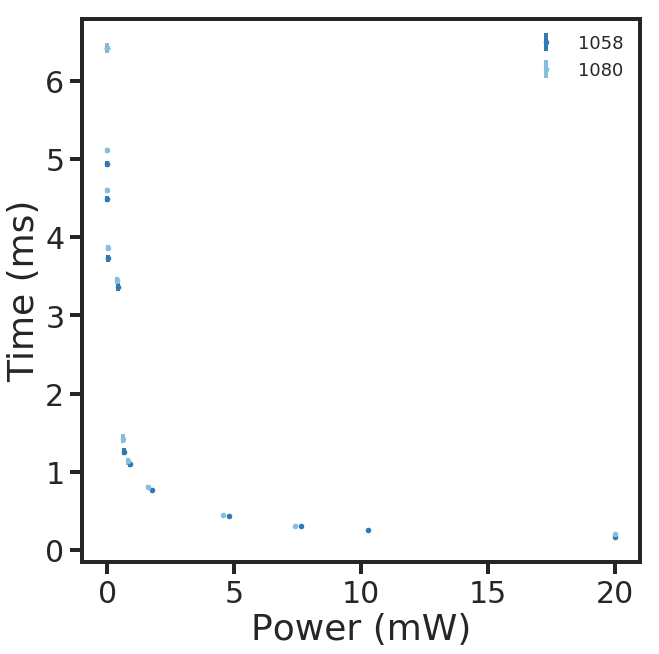

In [150]:
fig, ax = plt.subplots()
plt.errorbar(t1_1058Data.index.values, t1_1058Data['T1a'], yerr = t1_1058Data['T1a Error'], linestyle = 'none', fmt = 'o', label = '1058')
plt.minorticks_off()
plt.errorbar(t1_1080Data.index.values, t1_1080Data['T1a'], yerr = t1_1080Data['T1a Error'], linestyle = 'none', fmt = 'o', label = '1080')
# plt.xlim(-0.2, 2.5)
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
# plt.xticks('')
# ax.xaxis.set_minor_locator(minorLocator)
plt.savefig('Figures/T1 1058 vs 1080.pdf', transparent = True)

## 1058 vs 1080, log

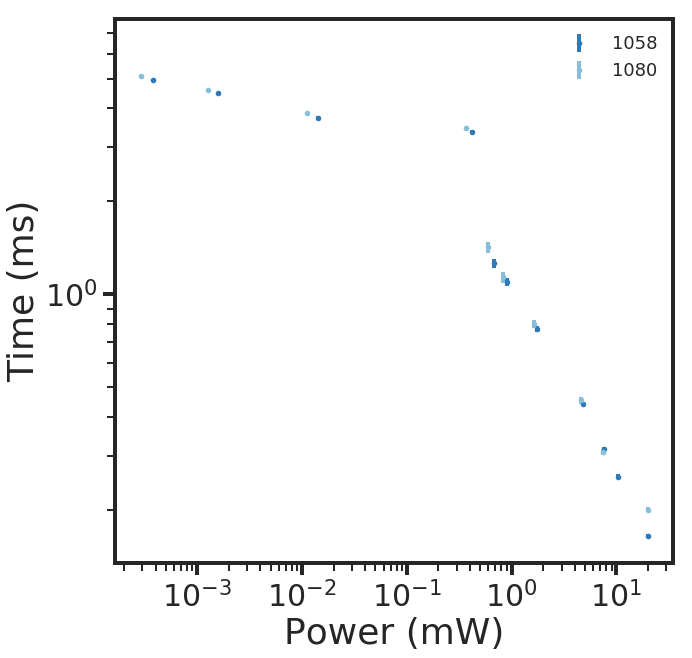

In [151]:
fig, ax = plt.subplots()
plt.errorbar(t1_1058Data.index.values, t1_1058Data['T1a'], yerr = t1_1058Data['T1a Error'], linestyle = 'none', fmt = 'o', label = '1058')
plt.minorticks_off()
plt.errorbar(t1_1080Data.index.values, t1_1080Data['T1a'], yerr = t1_1080Data['T1a Error'], linestyle = 'none', fmt = 'o', label = '1080')
# plt.xlim(-0.2, 2.5)
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
# plt.xticks('')
# ax.xaxis.set_minor_locator(minorLocator)
plt.savefig('Figures/T1 1058 vs 1080 log.pdf', transparent = True)

# T2 Plots
## 1058 vs 1080, lin


In [152]:
t2_1058Data

,T2,T2 Error,Stretch,Stretch Error
0.000379,0.237775,0.002144,1.805716,0.040631
7.648640,0.164301,0.002326,1.351836,0.035574
0.014240,0.231074,0.002257,1.737874,0.040612
0.001580,0.232281,0.002370,1.766593,0.043910
0.000000,0.238285,0.001840,1.789946,0.034181
20.000000,0.110884,0.002168,1.080232,0.028284
4.798820,0.182417,0.002782,1.415909,0.042907
0.902606,0.215351,0.002482,1.630551,0.043508
0.421639,0.226339,0.002263,1.691384,0.039255
1.757260,0.208289,0.002459,1.552806,0.040511


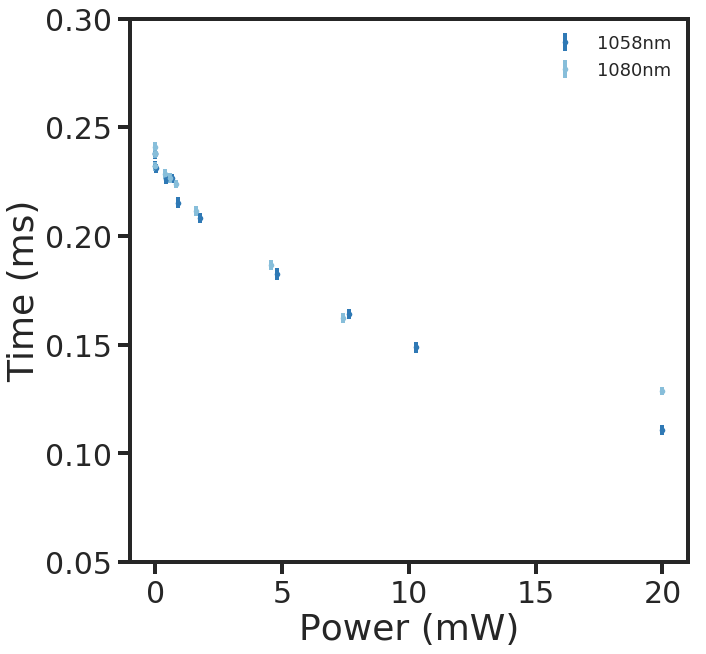

In [153]:
fig, ax = plt.subplots()
ax.minorticks_off()
ax.errorbar(t2_1058Data.index.values, t2_1058Data['T2'], yerr = t2_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = '1058nm')
ax.errorbar(t2_1080Data.index.values, t2_1080Data['T2'], yerr = t2_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = '1080nm')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
plt.ylim(0.05, 0.3)
# plt.xticks('')
# ax.xaxis.set_minor_locator(minorLocator)
plt.savefig('Figures/T2 1058 vs 1080.pdf', transparent = True)

## 1058 vs 1080, log


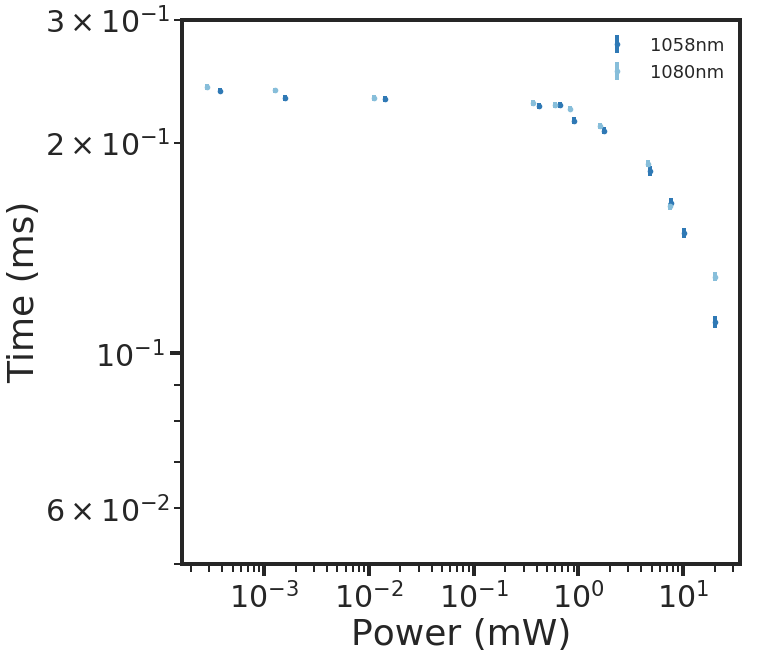

In [154]:
fig, ax = plt.subplots()
ax.minorticks_on()
ax.errorbar(t2_1058Data.index.values, t2_1058Data['T2'], yerr = t2_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = '1058nm')
ax.errorbar(t2_1080Data.index.values, t2_1080Data['T2'], yerr = t2_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = '1080nm')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
plt.ylim(0.05, 0.3)
# plt.xticks('')
# ax.xaxis.set_minor_locator(minorLocator)
plt.savefig('Figures/T2 1058 vs 1080 log.pdf', transparent = True)

# T1 vs T2

## 1058nm

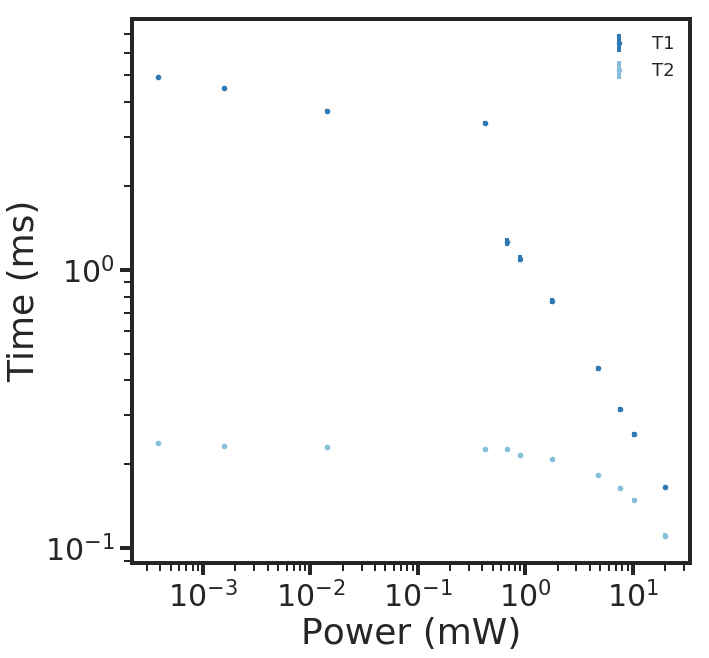

In [155]:
fig, ax = plt.subplots()
ax.minorticks_on()
ax.errorbar(t1_1058Data.index.values, t1_1058Data['T1a'], yerr = t1_1058Data['T1a Error'], linestyle = 'none', fmt = 'o', label = 'T1')
ax.errorbar(t2_1058Data.index.values, t2_1058Data['T2'], yerr = t2_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'T2')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
# plt.ylim(0.05, 0.3)
# plt.xticks('')
# ax.xaxis.set_minor_locator(minorLocator)
plt.savefig('Figures/T1 vs T2 1058log.pdf', transparent = True)

## 1080nm

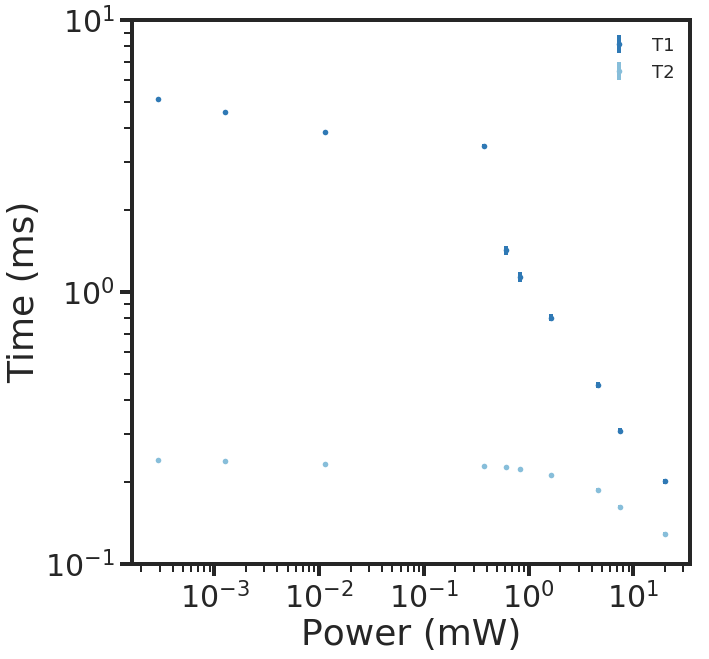

In [156]:
fig, ax = plt.subplots()
ax.minorticks_on()
ax.errorbar(t1_1080Data.index.values, t1_1080Data['T1a'], yerr = t1_1080Data['T1a Error'], linestyle = 'none', fmt = 'o', label = 'T1')
ax.errorbar(t2_1080Data.index.values, t2_1080Data['T2'], yerr = t2_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'T2')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
plt.ylim(0.1, 10)
# plt.xticks('')
# ax.xaxis.set_minor_locator(minorLocator)
plt.savefig('Figures/T1 vs T2 1080log.pdf', transparent = True)

# Dynamical decoupling

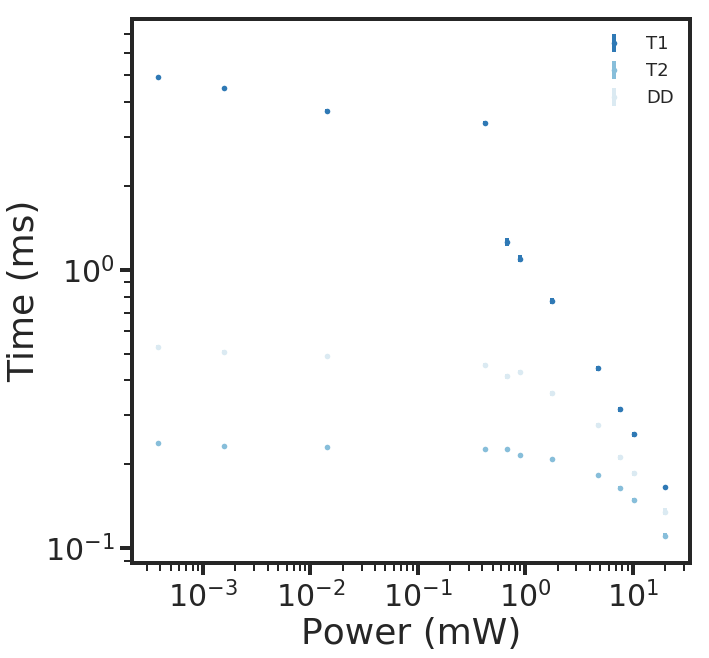

In [157]:
fig, ax = plt.subplots()
# ax.minorticks_off()
ax.errorbar(t1_1058Data.index.values, t1_1058Data['T1a'], yerr = t1_1058Data['T1a Error'], linestyle = 'none', fmt = 'o', label = 'T1')

ax.errorbar(t2_1058Data.index.values, t2_1058Data['T2'], yerr = t2_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'T2')
ax.errorbar(t2DD_1058Data.index.values, t2DD_1058Data['T2'], yerr = t2DD_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'DD')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
# ax.minorticks_on()
plt.savefig('Figures/T1 vs T2 vs DD 1058.pdf', transparent = True)

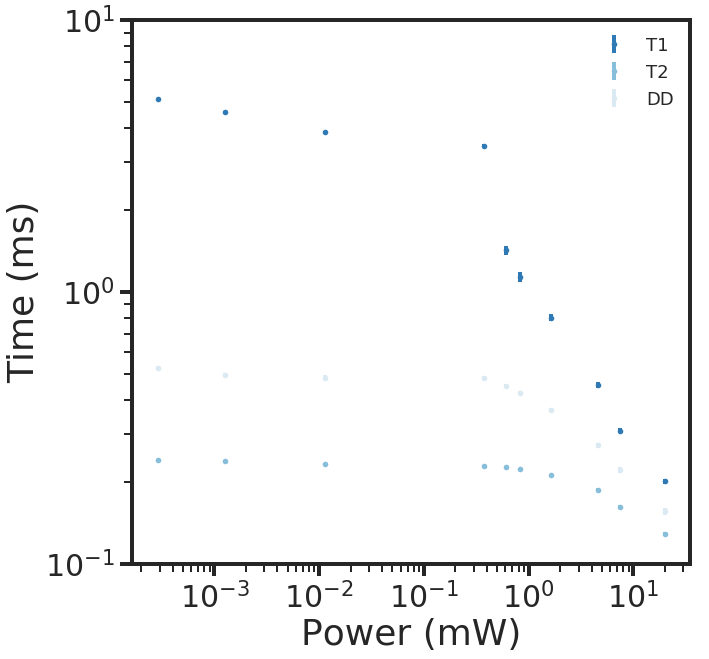

In [158]:
fig, ax = plt.subplots()
# ax.minorticks_off()
ax.errorbar(t1_1080Data.index.values, t1_1080Data['T1a'], yerr = t1_1080Data['T1a Error'], linestyle = 'none', fmt = 'o', label = 'T1')

ax.errorbar(t2_1080Data.index.values, t2_1080Data['T2'], yerr = t2_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'T2')
ax.errorbar(t2DD_1080Data.index.values, t2DD_1080Data['T2'], yerr = t2DD_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'DD')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
plt.ylim([0.1,10])
# ax.minorticks_on()
plt.savefig('Figures/T1 vs T2 vs DD 1080.pdf', transparent = True)

In [159]:

t1sDark = np.ones(100)*6.4
t2sDark = np.ones(100)*0.24
powersdark = np.logspace(-4, 0.1, 100)
powersdark

array([  1.00000000e-04,   1.10005435e-04,   1.21011957e-04,
         1.33119729e-04,   1.46438936e-04,   1.61090788e-04,
         1.77208622e-04,   1.94939115e-04,   2.14443621e-04,
         2.35899637e-04,   2.59502421e-04,   2.85466766e-04,
         3.14028957e-04,   3.45448919e-04,   3.80012585e-04,
         4.18034496e-04,   4.59860665e-04,   5.05871723e-04,
         5.56486388e-04,   6.12165270e-04,   6.73415066e-04,
         7.40793170e-04,   8.14912747e-04,   8.96448309e-04,
         9.86141859e-04,   1.08480964e-03,   1.19334956e-03,
         1.31274937e-03,   1.44409565e-03,   1.58858370e-03,
         1.74752840e-03,   1.92237621e-03,   2.11471831e-03,
         2.32630507e-03,   2.55906200e-03,   2.81510728e-03,
         3.09677100e-03,   3.40661640e-03,   3.74746317e-03,
         4.12241315e-03,   4.53487851e-03,   4.98861281e-03,
         5.48774521e-03,   6.03681797e-03,   6.64082785e-03,
         7.30527154e-03,   8.03619571e-03,   8.84025203e-03,
         9.72475767e-03,

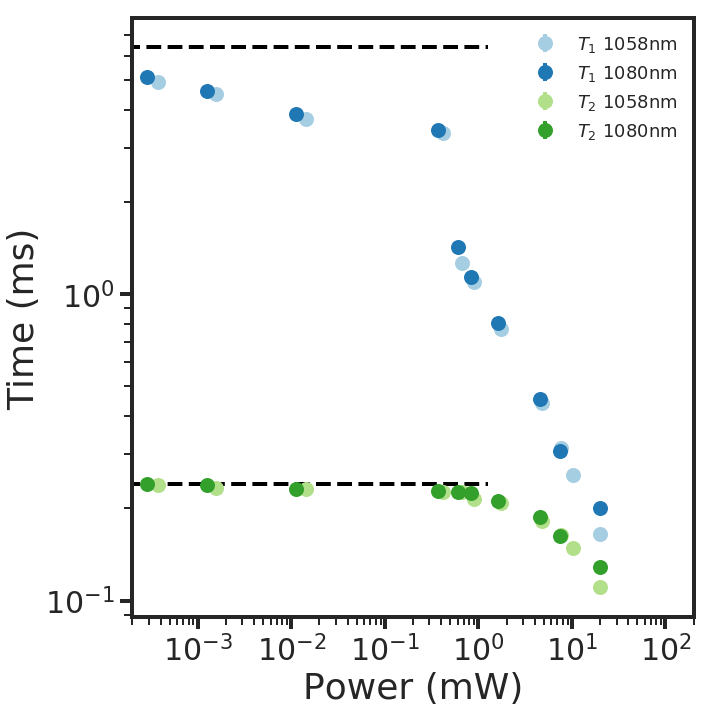

In [174]:
fig, ax = plt.subplots()
sns.set_palette("Paired")
# fig.set_cmap('coolwarm')

# ax.minorticks_off()
ax.errorbar(t1_1058Data.index.values, t1_1058Data['T1a'], yerr = t1_1058Data['T1a Error'], linestyle = 'none', fmt = 'o', label = r'$T_1$ 1058nm', ms=15)
ax.errorbar(t1_1080Data.index.values, t1_1080Data['T1a'], yerr = t1_1080Data['T1a Error'], linestyle = 'none', fmt = 'o', label = r'$T_1$ 1080nm', ms=15)


ax.errorbar(t2_1058Data.index.values, t2_1058Data['T2'], yerr = t2_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = r'$T_2$ 1058nm', ms=15)
ax.errorbar(t2_1080Data.index.values, t2_1080Data['T2'], yerr = t2_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = r'$T_2$ 1080nm', ms=15)


# ax.errorbar(t2DD_1058Data.index.values, t2DD_1058Data['T2'], yerr = t2DD_1058Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'DD 1058nm', ms=15)

# ax.errorbar(t2DD_1080Data.index.values, t2DD_1080Data['T2'], yerr = t2DD_1080Data['T2 Error'], linestyle = 'none', fmt = 'o', label = 'DD 1080nm', ms=15)
plt.plot(powersdark, t1sDark, linestyle = '--', color = '0')
plt.plot(powersdark, t2sDark, linestyle = '--', color = '0')
# ax.tick_params(axis='both', direction='in')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 18, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.xlabel('Power (mW)')
plt.ylabel('Time (ms)')
plt.xlim(0.0002, 200)
plt.tight_layout()
plt.savefig('Figures/T1vsT2lowpower.pdf', transparent = True)


In [161]:
from matplotlib import cm
from collections import OrderedDict
cmaps = OrderedDict()

In [162]:
plt.rcParams['image.cmap'] = 'jet'

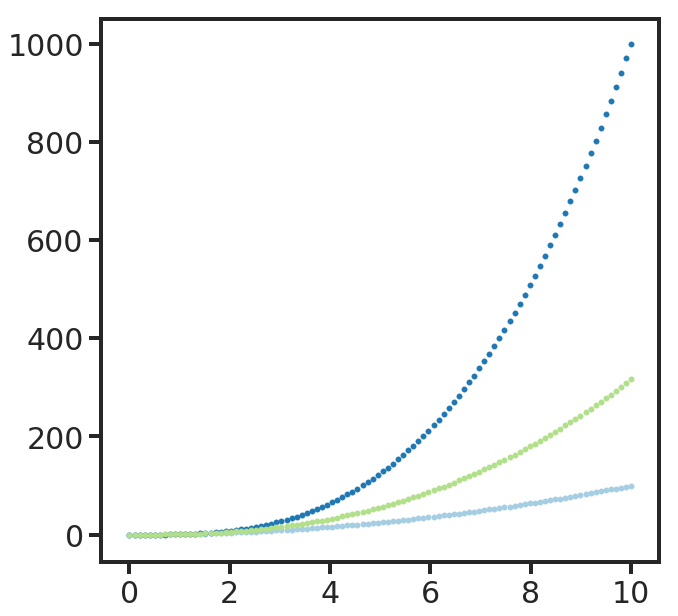

In [163]:
x = np.linspace(0, 10, 100)
y = x**2
w = x**2.5
z = x**3
plt.scatter(x, y)
plt.scatter(x, z)
plt.scatter(x, w)


In [164]:
powersForT1 = t1_1058Data.index.values

In [165]:
powersForT1

array([  6.72032456e-01,   2.00000000e+01,   7.64864000e+00,
         4.79882000e+00,   1.75726000e+00,   1.58000000e-03,
         1.02728800e+01,   1.42400000e-02,   3.79106780e-04,
         0.00000000e+00,   9.02606055e-01,   4.21638722e-01])

In [166]:
t1_1058Data

,T1a,T1a Error,T1b,T1b Error
0.672032,1.259604,0.045337,7.254276,0.246299
20.000000,0.165226,0.002544,5.520935,0.082822
7.648640,0.315185,0.005809,6.420111,0.117520
4.798820,0.441843,0.007816,6.614629,0.109267
1.757260,0.772755,0.019250,7.191736,0.171318
0.001580,4.485564,0.038455,4.485564,0.038455
10.272880,0.256518,0.004851,6.054457,0.113920
0.014240,3.729229,0.048314,3.729229,0.048314
0.000379,4.932700,0.036284,4.932700,0.036284
0.000000,6.412614,0.064082,6.412614,0.064082


In [167]:
t1_1058Data.to_pickle('../Data/t1_1058.pkl')
t2_1058Data.to_pickle('../Data/t2_1058.pkl')

In [168]:
t2s1058.keys()

dict_keys(['47_NatP_T2_20mW_1058.77_ND4.6_8k.DTA', '14_NatP_T2_20mW_ND0.4_8k.DTA', '39_NatP_T2_20mW_1058.77_ND3.0_8k.DTA', '43_NatP_T2_20mW_1058.77_ND4.0_8k.DTA', '01_NatP_T2_noLas_8k.DTA', '06_NatP_T2_20mW_1058.77_8k.DTA', '18_NatP_T2_20mW_1058.77_ND0.6_8k.DTA', '26_NatP_T2_20mW_1058.77_ND1.2_8k.DTA', '34_NatP_T2_20mW_1058.77_ND1.6_8k.DTA', '22_NatP_T2_20mW_1058.77_ND1.0_8k.DTA', '10_NatP_T2_20mW_ND0.2_8k.DTA', '30_NatP_T2_20mW_1058.77_ND1.4_8k.DTA'])

No handles with labels found to put in legend.


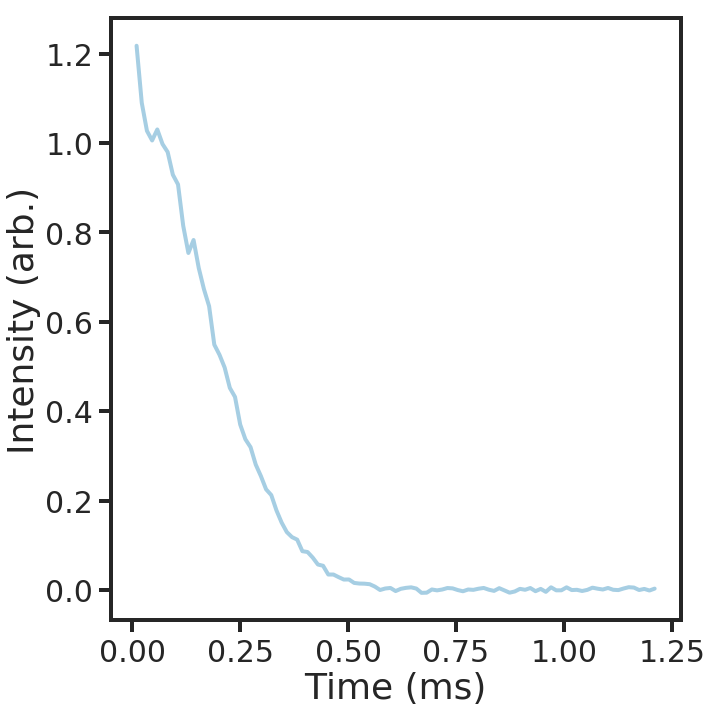

In [169]:
t2s1058['01_NatP_T2_noLas_8k.DTA']['Real'].plot(label = '')
t2s1058['01_NatP_T2_noLas_8k.DTA'].power
# plt.plot(times, stretchedExpDecay(times, *popt), label = r'$\propto e^{-\left(\frac{t}{0.238}\right)^{1.8}}$')

plt.legend(fontsize = 36, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.ylabel('Intensity (arb.)')
plt.tight_layout()
plt.savefig('Figures/T2Dark.pdf', transparent = True)



In [170]:
def fitStretchedExp2(data):
    popt, pcov = curve_fit(stretchedExpDecay, data.index.values, data['Real'], bounds = ([0, 0, -5, 1], [10, 10, 5, 3]))
    T2 = popt[1]
    errs = np.sqrt(np.diag(pcov))
    T2err = errs[1]
    Stretch = popt[3]
    StErr = errs[3]
    return popt

In [171]:
popt= fitStretchedExp2(t2s1058['01_NatP_T2_noLas_8k.DTA'])
times = np.linspace(0, 1.2, 1000)

In [172]:
stretchedExpDecay(np.linspace(0, 0.8, 1000), a, b, c, d)

NameError: name 'a' is not defined

In [ ]:

t1s1058Conc['02_NatP_T1_noLas_8k.DTA']['Real'].plot(label = '')
plt.plot(time, expDecay(time, *popt2), label = r'$\propto -e^{\frac{t}{6.41}}$')
plt.legend(fontsize = 36, ncol = 1, fancybox = True, frameon = False, framealpha = 0)
plt.ylabel('Intensity (arb.)')
plt.tight_layout()
plt.savefig('Figures/T1Dark.pdf', transparent = True)

In [ ]:
popt2 = fitInvRec(t1s1058Conc['02_NatP_T1_noLas_8k.DTA'])

In [ ]:
def fitInvRec(data):
    popt, pcov = curve_fit(expDecay, data.index.values, data['Real'])
    T1 = popt[1]
    errs = np.sqrt(np.diag(pcov))
    T1err = errs[1]
    return popt

In [ ]:
time = np.linspace(0, 38, 1000)

In [ ]:
popt2

In [ ]:
t2_1058Data

In [ ]:
t1bs = t1_1058Data.sort_index().iloc[5:]
t1bs

In [ ]:
fill_powers = np.linspace(0, 20, 1000)
darkT1s = np.ones(1000)*6.41

In [ ]:
# darkT1s

In [ ]:
plt.errorbar(t1_1058Data.index.values, t1_1058Data['T1a'], yerr=t1_1058Data['T1a Error'], linestyle = 'none', marker = 'o')
plt.errorbar(t1bs.index.values, t1bs['T1b'], yerr=t1bs['T1b Error'], linestyle = 'none', marker = 'o')
plt.plot(fill_powers, darkT1s)
plt.xscale('log')
plt.yscale('log')

In [ ]:
t1_1080hp

In [ ]:
t1scombined = pd.concat([t1_1080hp, t1_1080Data]).sort_index()
t1scombined.to_pickle('../Data/t1scomb')

In [ ]:
t1scombined['T1a'].plot(linestyle='none', marker = 'o')
t1scombined['T1b'].plot(linestyle= 'none', marker = 'o')
plt.plot(fill_powers, darkT1s)
plt.xscale('log')
plt.yscale('log')


In [ ]:
t1_1058Data

In [ ]:
t1_1058Data.T1a.plot(linestyle = 'none', marker = 'o')
plt.xscale('log')
plt.yscale('log')

# Equations for $T_1$ and $T_2$

## $T_1$

In [176]:
import seaborn as sns
sns.set_style("ticks",{
    
    'xtick.major.size': 15.0,
    'ytick.major.size': 15.0,
    'xtick.minor.size': 10.0,
    'ytick.minor.size': 10.0,
    'xtick.major.width': 5.0,
    'axes.linewidth': 4.0,
    'font.sans-serif': [u'Bitstream Vera Sans']
    })
sns.set_context("paper", font_scale=4, rc = {
    "lines.linewidth": 4.0,
    'xtick.major.width': 4.0,
    'ytick.major.width': 4.0,
    'xtick.minor.width': 3.0,
    'ytick.minor.size': 10.0,
    'ytick.minor.width': 3.0
    
})
# sns.axes_style(
#     {
#     'axes.linewidth': 10.0,
#     'xtick.major.size': 5.0,
#     }
# )

In [191]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 10):
        plt.plot(x, np.sin(x+i*.4)*(10-i)*flip)

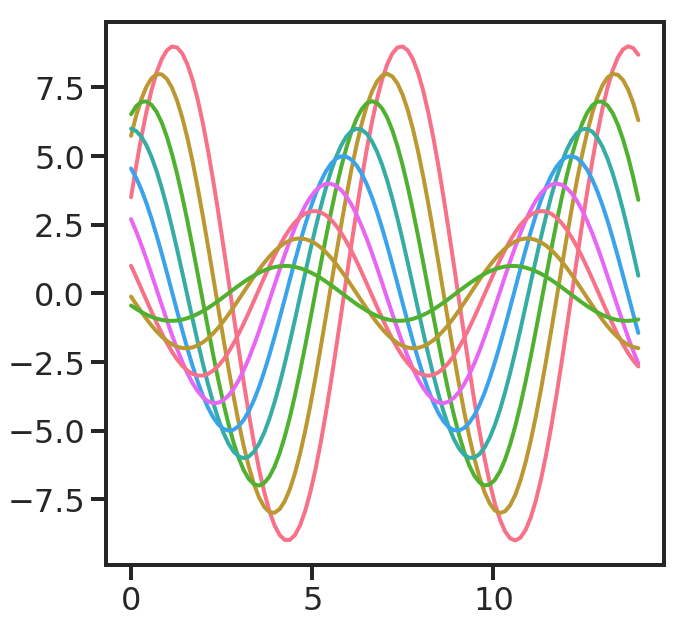

In [195]:
sns.set_palette("husl")
# np.random.seed(sum(map(ord, "palettes")))
sinplot()